In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



# Load the pickled data frame for the phase plot and plot it

Enter the value of the quark mass and lambda, and the following code will read in the pickled data frame produced by `critical_point.py`, if it exists.

In [5]:
ml=38
lambda1=-4.25
# read in the pickle file to a data frame
df = pd.read_pickle('data/phase_plot_zoom_mq_'+str(ml)+'_lambda_'+str(lambda1)+'.pkl')

This code will then plot the phase diagram, with the points colored by the order.

In [3]:
#plot Tc vs mu, with label for order parameter, color map red and blue
plt.scatter(df['mu'],df['Tc'],c=df['order'],cmap='viridis_r')
plt.xlabel('$\mu$ (MeV)')
plt.ylabel('$T_c$ (MeV)')
#title the plot with the values of ml and lambda
plt.title('Phase plot for $m_q$='+str(ml)+' MeV, $\lambda_1$='+str(lambda1))
# plt.colorbar()
plt.show()





AttributeError: 'DataFrame' object has no attribute '_data'

# Load the data for each value of $\mu$

The $\sigma$ vs. temperature data was also pickled for each value of mu. This code will read in each of these data frames, while also storing the values of $\mu$ in a list.

This is useful for visually checking the results for each point in the phase diagram above.

In [11]:
# loop over the mu values 
i=0
mu_list=[]
for mu in df['mu'].unique():
    #import the pickle file for the current mu value, store in a dataframe named with the value of mu rounded to an integer
    globals()['df'+str(i)]=pd.read_pickle('data/sigma_transition_mq_'+str(ml)+'_lambda_'+str(lambda1)+'_mu_'+str(mu)+'.pkl')
    #append the current mu value to the list
    mu_list.append(mu)
    i=i+1



AttributeError: 'DataFrame' object has no attribute '_data'

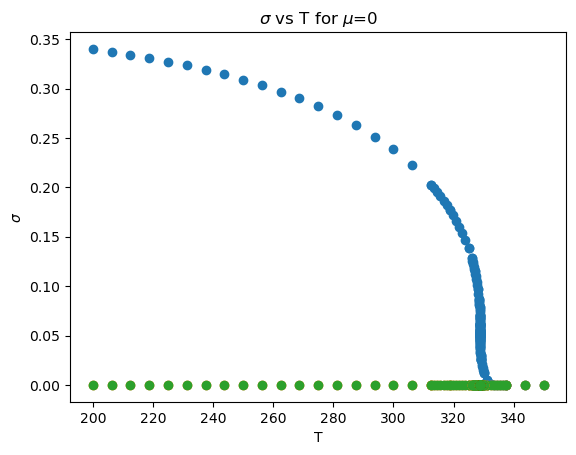

In [89]:
i=0
# Define the colors for each column of sigma, using the standard matplotlib color cycle. 
# This lets us easily identify multi-valued points in the plot, which will show up as green and orange dots.
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# We need to plot each level of zoom separately, so we need to loop over the number of entries in the temperature list
for j in range(len(globals()['df'+str(i)]['sigma'])):
    # We also need to loop over the number of columns in sigma, to plot each column separately
    for k in range(3): # Assuming there are three columns 0, 1, 2
        plt.plot(globals()['df'+str(i)]['temps'][j],(globals()['df'+str(i)]['sigma'][j][:,k]/1000)**3, 
                 'o', color=colors[k], label='sigma'+str(j)+'_col'+str(k))

plt.xlabel('T')
plt.ylabel('$\sigma$')
#title the plot using mu_list[i]
plt.title('$\sigma$ vs T for $\mu$='+str(mu_list[i]))
# plt.legend()
plt.show()

In [90]:
mu_list

[0,
 128,
 256,
 384,
 512,
 640,
 768,
 896,
 1024,
 1152,
 1280,
 1408,
 1536,
 1664,
 1792,
 1920,
 2048,
 2176,
 2304,
 2432,
 2560,
 2688,
 2816,
 2944,
 3072,
 3200,
 3328,
 3456,
 3584,
 3712,
 3840,
 3968,
 4096,
 4224,
 4352,
 4480,
 4608,
 4736,
 4864,
 4992]

# Checking the most-zoomed data
If you doubt that the most-zoomed data is correct, you can check it here. If there plot is multi-valued, it should start to resemble an S-curve. If not, there is a problem.

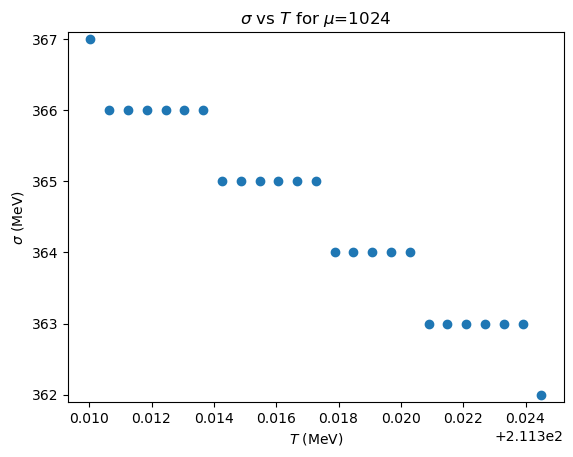

In [82]:
# for the i'th dataframe, plot sigma vs T for the last element of sigma_list
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
j=len(globals()['df'+str(i)]['sigma'])-1
for k in range(3):
    plt.plot(globals()['df'+str(i)]['temps'][j],globals()['df'+str(i)]['sigma'][j][:,k], 
             'o', color=colors[k])

plt.xlabel('$T$ (MeV)')
plt.ylabel('$\sigma$ (MeV)')
plt.ylim(min(globals()['df'+str(i)]['sigma'][j][:,0])-0.1,max(globals()['df'+str(i)]['sigma'][j][:,0])+0.1)
plt.title('$\sigma$ vs $T$ for $\mu$='+str(mu_list[i]))
plt.show()

